<a href="https://colab.research.google.com/github/Murega14/house_rent_prediction/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Rent Prediction


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading and Understanding the Data

In [ ]:
df = pd.read_csv('House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
# getting columns and their data types
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 2.6 MB


In [ ]:
# checking for any missing values
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
# checking for any duplicate values
df.duplicated().sum()

0

In [ ]:
# getting summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


<Axes: >

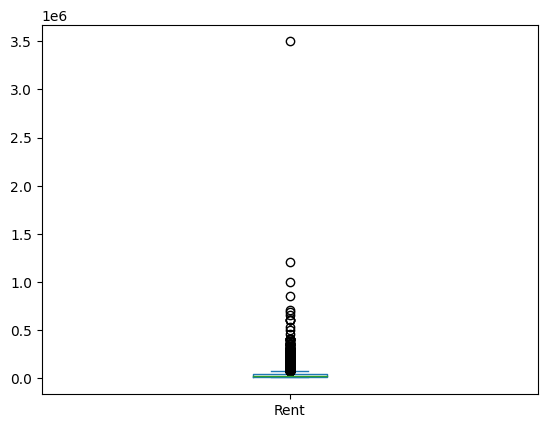

In [ ]:
# checking for outliers in the rent column
df['Rent'].plot(kind='box')

In [ ]:
# filtering houses whose rent is above 35k
high_rent = df[df['Rent'] > 35000]
high_rent

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
15,2022-06-01,3,40000,1286,1 out of 1,Carpet Area,New Town Action Area 1,Kolkata,Furnished,Bachelors/Family,2,Contact Owner
74,2022-05-22,3,40000,1500,Ground out of 2,Super Area,Beliaghata,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
104,2022-06-16,2,180000,950,Ground out of 1,Carpet Area,"Avenue S, Santoshpur",Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
164,2022-06-07,3,40000,1220,2 out of 3,Carpet Area,Salt Lake City Sector 3,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
169,2022-04-30,4,40000,1300,1 out of 2,Super Area,Ballygunge,Kolkata,Unfurnished,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4671,2022-06-18,3,60000,2170,4 out of 5,Carpet Area,Kakatiya Hills Madhapur,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4698,2022-07-02,3,53000,2300,1 out of 5,Carpet Area,"Banjara Hills, NH 9",Hyderabad,Furnished,Bachelors,3,Contact Agent
4712,2022-07-06,3,60000,2405,10 out of 14,Super Area,"Manikonda, Outer Ring Road",Hyderabad,Semi-Furnished,Bachelors,3,Contact Agent
4716,2022-04-29,4,110000,3250,12 out of 17,Carpet Area,Madhapur,Hyderabad,Semi-Furnished,Bachelors/Family,5,Contact Owner


# Exploratory Data Analysis

In [ ]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


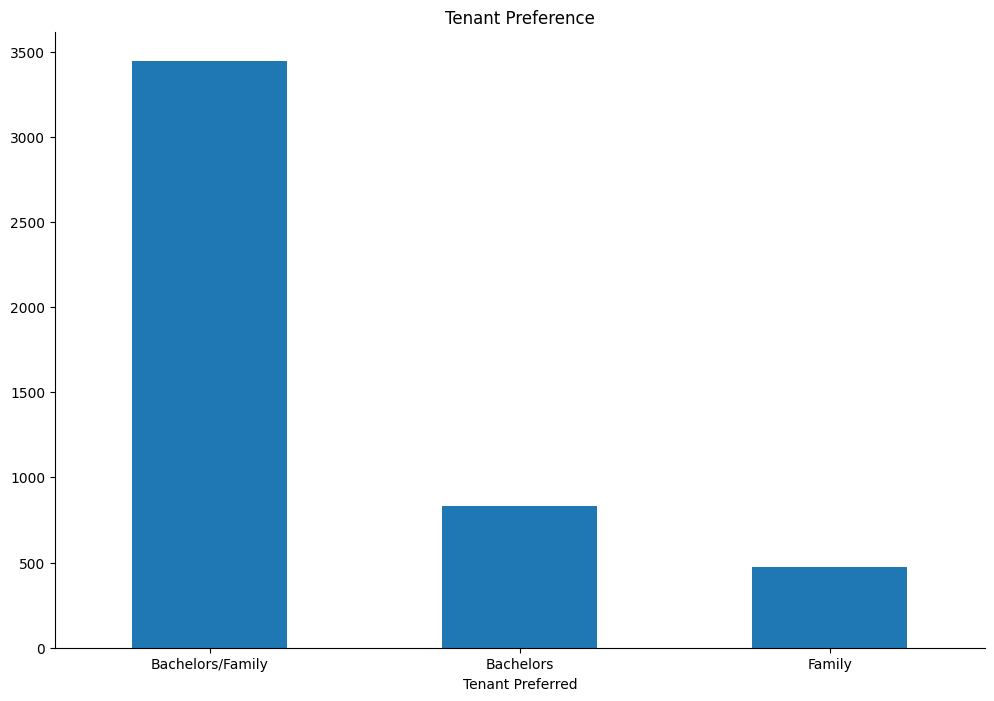

In [ ]:
# visualizing tenant preference
tenants_preferred = df['Tenant Preferred'].value_counts()
#setting the figure size
plt.figure(figsize=(12, 8))
#plotting the data
ax = tenants_preferred.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Tenant Preference")
plt.gca().spines[['top', 'right',]].set_visible(False)


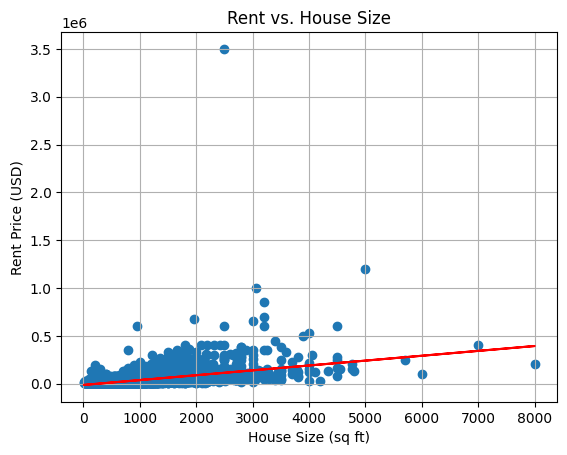

In [ ]:
# comparing how size affects rent

# performing linear regression to add a regression line to the plot
# this makes it easier to see the overall trend
coefficients = np.polyfit(df['Size'], df['Rent'], 1)
poly_function = np.poly1d(coefficients)

#plotting the data
plt.scatter(df['Size'], df['Rent'])
plt.plot(df['Size'], poly_function(df['Size']), color='red')
plt.title('Rent vs. House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Rent Price (USD)')
plt.grid(True)
plt.show()

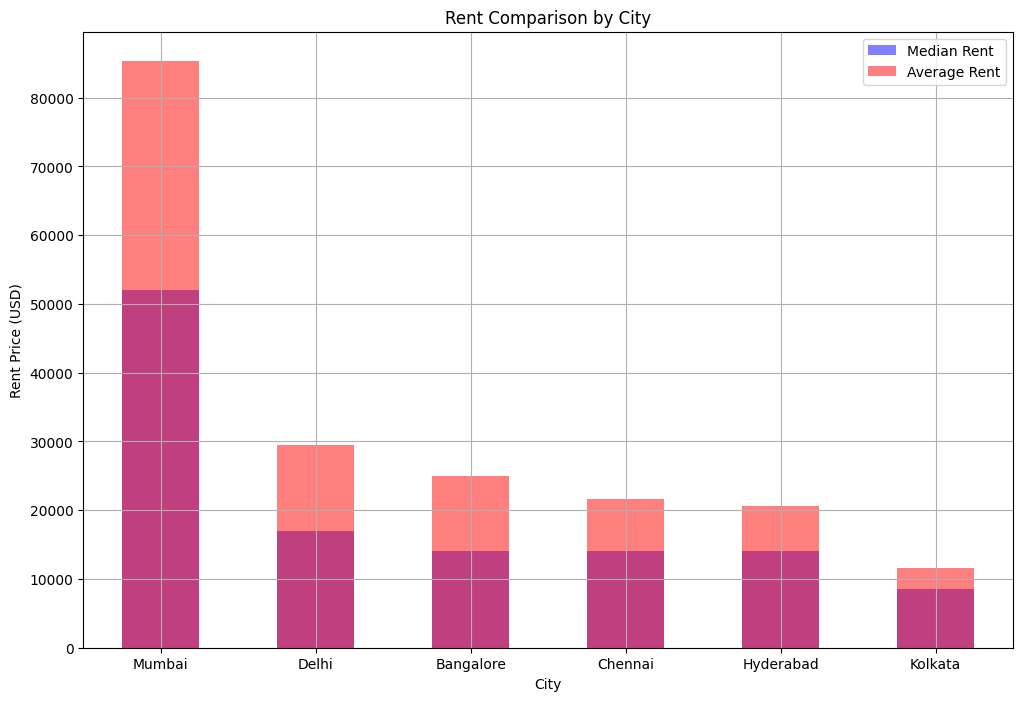

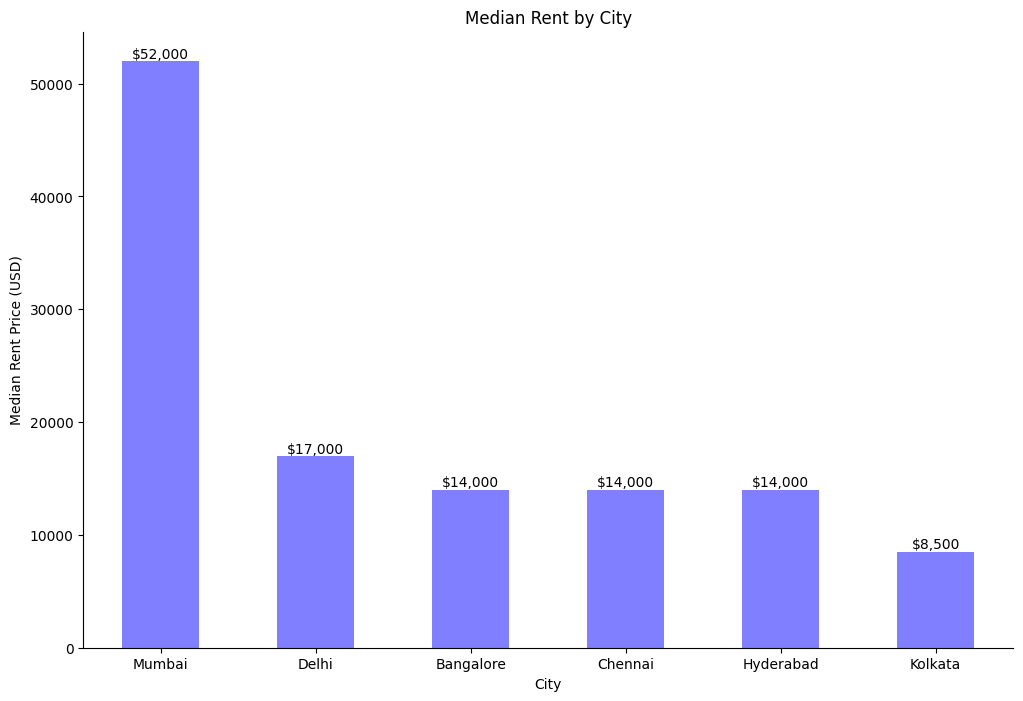

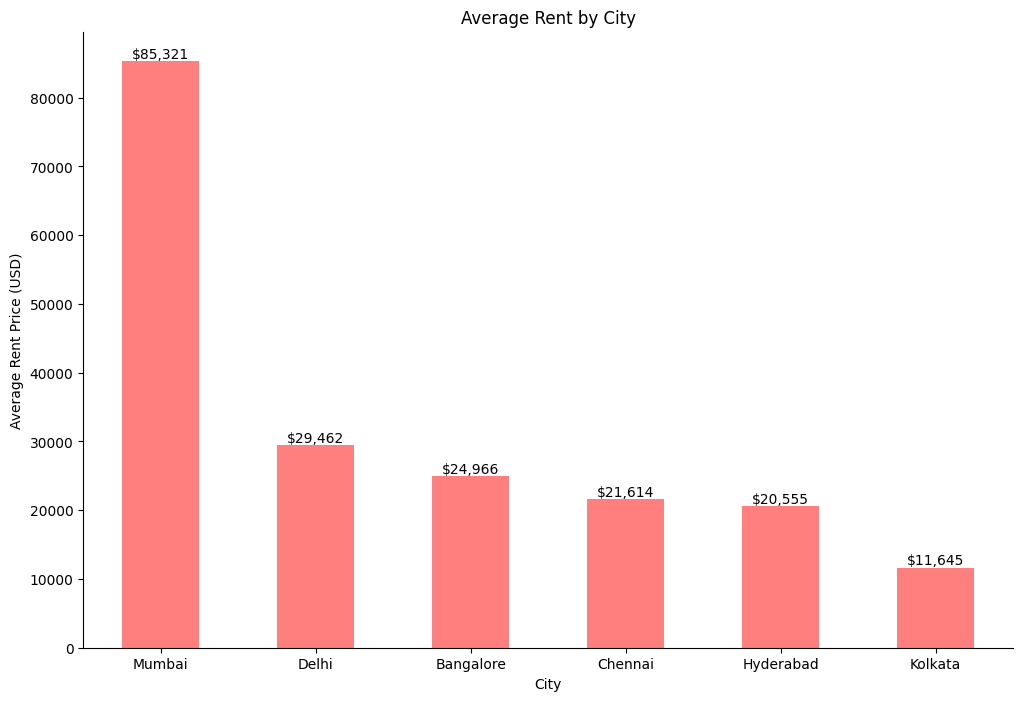

In [ ]:
# grouping the data by rent and city
rent_by_city = df.groupby('City')['Rent'].median().sort_values(ascending=False)
avg_city_rent = df.groupby('City')['Rent'].mean().sort_values(ascending=False)

# setting the figure size
plt.figure(figsize=(12, 8))

# plotting median rent by city
ax = rent_by_city.plot(kind='bar', color='blue', alpha=0.5, label='Median Rent')

# plotting average rent by city
avg_city_rent.plot(kind='bar', color='red', alpha=0.5, label='Average Rent')

plt.xticks(rotation=0)
plt.xlabel('City')
plt.ylabel('Rent Price (USD)')
plt.title('Rent Comparison by City')
plt.legend()
plt.grid(True)
plt.show()

# plotting and annotating the median rent plot
plt.figure(figsize=(12, 8))
ax = rent_by_city.plot(kind='bar', color='blue', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('City')
plt.ylabel('Median Rent Price (USD)')
plt.title('Median Rent by City')
plt.gca().spines[['top', 'right',]].set_visible(False)

for bars in ax.patches:
    ax.annotate('${:,.0f}'.format(bars.get_height()), (bars.get_x() + bars.get_width() / 2, bars.get_height()),
                ha='center', va='bottom')

plt.show()

# plotting and annotating the average rent plot
plt.figure(figsize=(12, 8))
ax = avg_city_rent.plot(kind='bar', color='red', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('City')
plt.ylabel('Average Rent Price (USD)')
plt.title('Average Rent by City')
plt.gca().spines[['top', 'right',]].set_visible(False)

for bars in ax.patches:
    ax.annotate('${:,.0f}'.format(bars.get_height()), (bars.get_x() + bars.get_width() / 2, bars.get_height()),
                ha='center', va='bottom')

plt.show()


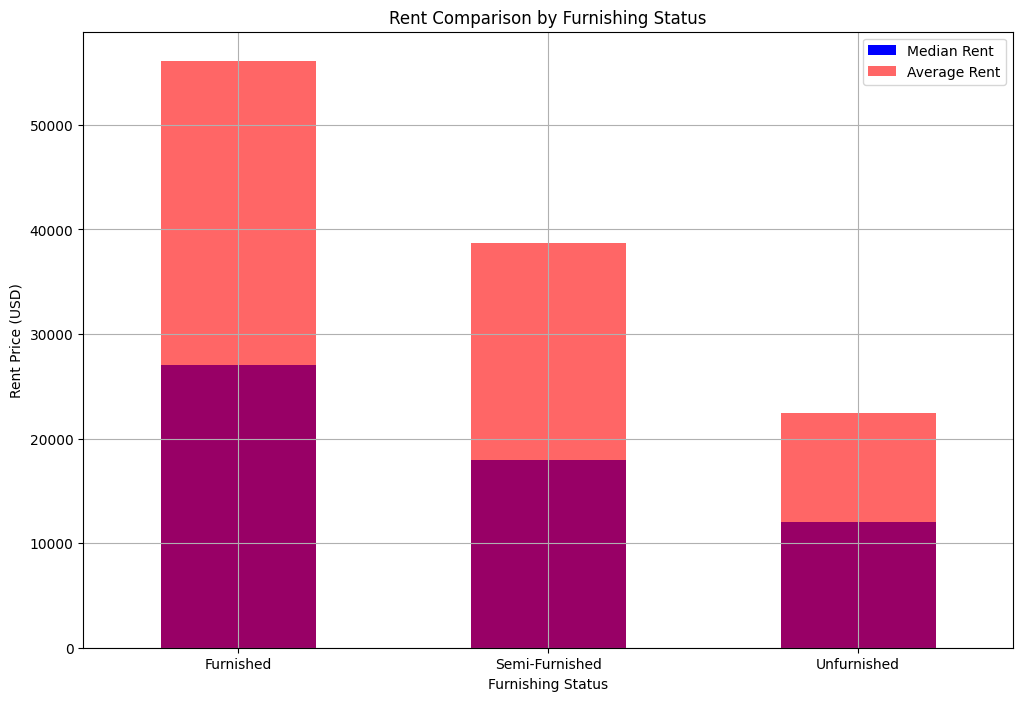

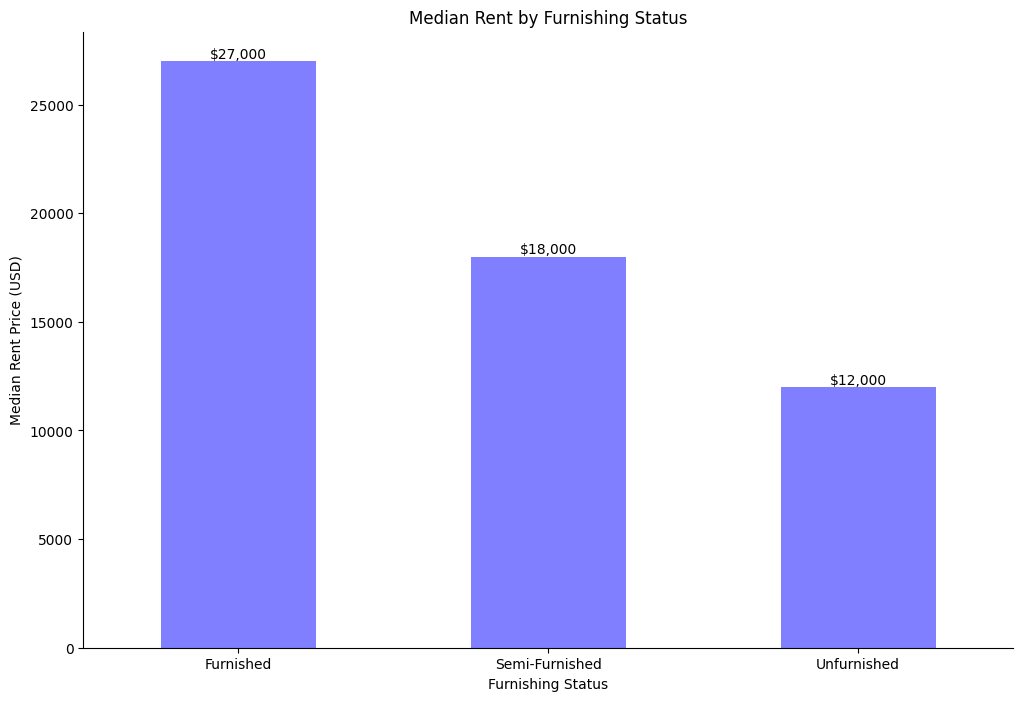

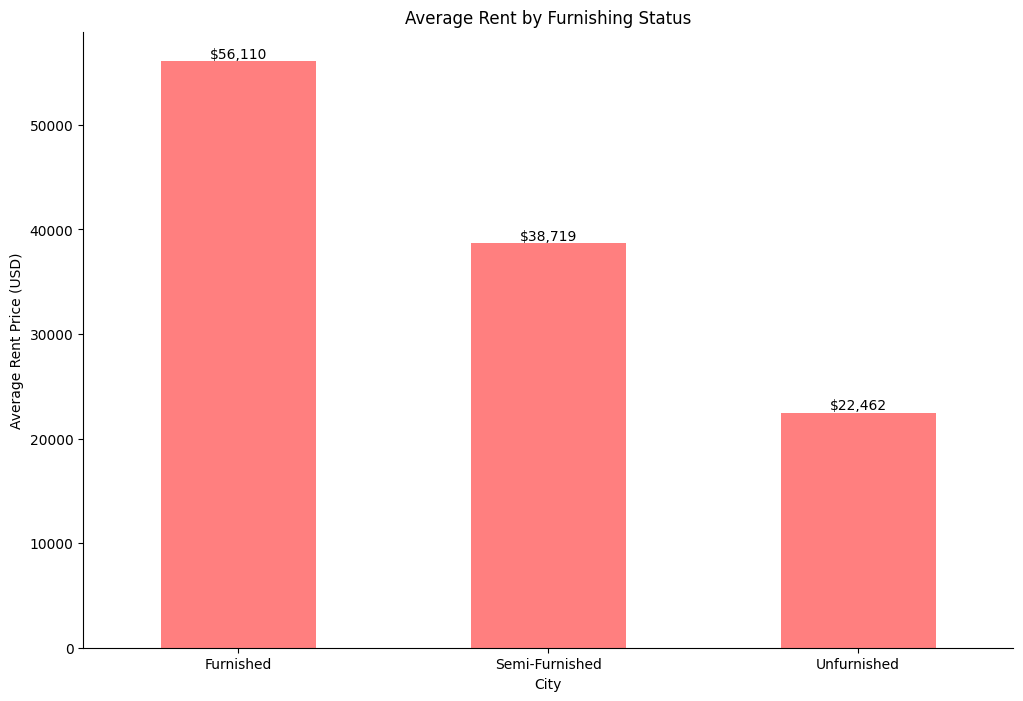

In [ ]:
# grouping the data by rent and city
rent_by_furnishing = df.groupby('Furnishing Status')['Rent'].median().sort_values(ascending=False)
avg_furnishing_rent = df.groupby('Furnishing Status')['Rent'].mean().sort_values(ascending=False)

# setting the figure size
plt.figure(figsize=(12, 8))

# plotting median rent by furnishing status
ax = rent_by_furnishing.plot(kind='bar', color='blue', alpha=1, label='Median Rent')

# plotting average rent by furnishing status
avg_furnishing_rent.plot(kind='bar', color='red', alpha=.6, label='Average Rent')

plt.xticks(rotation=0)
plt.xlabel('Furnishing Status')
plt.ylabel('Rent Price (USD)')
plt.title('Rent Comparison by Furnishing Status')
plt.legend()
plt.grid(True)
plt.show()

# plotting and annotating the median rent plot
plt.figure(figsize=(12, 8))
ax = rent_by_furnishing.plot(kind='bar', color='blue', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Furnishing Status')
plt.ylabel('Median Rent Price (USD)')
plt.title('Median Rent by Furnishing Status')
plt.gca().spines[['top', 'right',]].set_visible(False)


for bars in ax.patches:
    ax.annotate('${:,.0f}'.format(bars.get_height()), (bars.get_x() + bars.get_width() / 2, bars.get_height()),
                ha='center', va='bottom')

plt.show()

# plotting and annotating the average rent plot
plt.figure(figsize=(12, 8))
ax = avg_furnishing_rent.plot(kind='bar', color='red', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('City')
plt.ylabel('Average Rent Price (USD)')
plt.title('Average Rent by Furnishing Status')
plt.gca().spines[['top', 'right',]].set_visible(False)


for bars in ax.patches:
    ax.annotate('${:,.0f}'.format(bars.get_height()), (bars.get_x() + bars.get_width() / 2, bars.get_height()),
                ha='center', va='bottom')

plt.show()


In [ ]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
df['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

Text(0.5, 1.0, 'Bedroom, Halls, Kitchen by Rent')

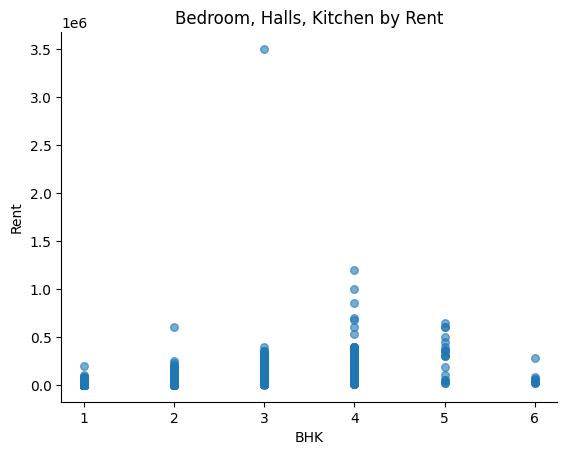

In [ ]:
# visualizing the relationship between BHK(bedroom, halls, kitchen) and rent
df.plot(kind='scatter', x='BHK', y='Rent', s=30, alpha=.6)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Bedroom, Halls, Kitchen by Rent")